In [1]:
import optforge as of
from optforge.benchmark.vobench_benchmarks import VOBenchmark
import vobench as vb
import numpy as np
import gradient_free_optimizers as gfo
inputs = vb.imread(r"F:\Stuff\Programming\AI\VOBench\notebooks\affine\A2.jpeg")[:,:,0]
targets = vb.imread(r"F:\Stuff\Programming\AI\VOBench\notebooks\affine\A.jpeg")[:,:,0]


Results: '<lambda>'  
   Best score: -0.14400916393773125  
   Best parameter:
      'x' : -0.2952952952952953  
      'y' : 0.8898898898898899  
 
   Random seed: 742571542  
 
   Evaluation time   : 0.18398165702819824 sec    [34.01 %]
   Optimization time : 0.3570289611816406 sec    [65.99 %]
   Iteration time    : 0.5410106182098389 sec    [1848.39 iter/sec]
 


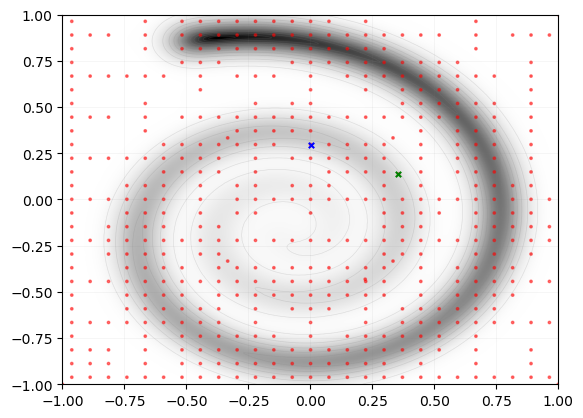

In [25]:
# nevergrad
vob = vb.ImageDescent(vb.surfaces.OUTWARD_GAUSS, (500,500),)

search_space = {
    "x": np.linspace(-1, 1, 1000),
    "y": np.linspace(-1, 1, 1000),
}

opt = gfo.DirectAlgorithm(search_space)
opt.search(lambda p: -vob.step_noline((list(p.values()))), n_iter = 1000)

vob.plot()

evals: 1000/1000 | best value: 0.1278                            
Job finished in 1.0s., did 1000 evaluations.


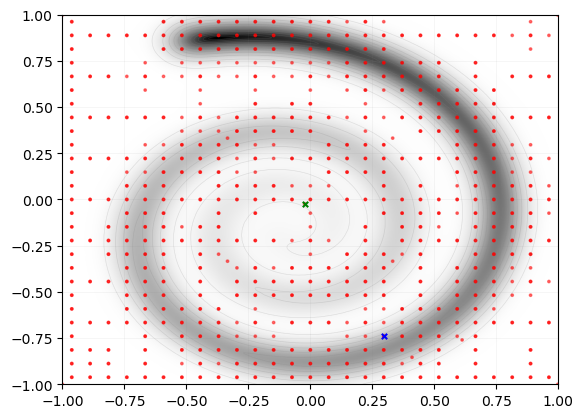

In [21]:
# optforge - scaling = nevergrad
vob = vb.ImageDescent(vb.surfaces.OUTWARD_GAUSS, (500,500),)

optimizer = of.integrations.GFOWrapper(gfo.DirectAlgorithm)

study = of.minimize(
    vob.step_noline,
    vob.params,
    optimizer,
    max_evals = 1000,
    bounds = (-1, 1)
)

vob.plot()